In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import model_selection
%matplotlib inline
from IPython.display import Image  
from sklearn import tree
import pydotplus 

In [2]:
weather = pd.read_csv("C:/MRT/clusters_5/noTime.csv")
weather.head()

,Unnamed: 0,,StnPres,Temperature,RH,WS,WD,Precp,Holiday,morning,moon,night,target
0,0,0,1014.8,20.1,71.0,1.3,60.0,0.0,1,1,0,0,0
1,1,1,1014.4,19.9,73.0,0.8,67.0,0.0,1,1,0,0,0
2,2,2,1013.4,19.4,76.0,0.7,82.0,0.0,1,1,0,0,0
3,3,3,1013.9,19.5,77.0,0.7,102.0,0.0,1,1,0,0,0
4,4,4,1014.7,19.6,75.0,0.5,95.0,0.0,1,1,0,0,0


In [3]:
weather_count=weather.drop(['Unnamed: 0'],axis=1)
weather_dropna=weather_count.dropna()
weather_dropna

,,StnPres,Temperature,RH,WS,WD,Precp,Holiday,morning,moon,night,target
0,0,1014.8,20.1,71.0,1.3,60.0,0.0,1,1,0,0,0
1,1,1014.4,19.9,73.0,0.8,67.0,0.0,1,1,0,0,0
2,2,1013.4,19.4,76.0,0.7,82.0,0.0,1,1,0,0,0
3,3,1013.9,19.5,77.0,0.7,102.0,0.0,1,1,0,0,0
4,4,1014.7,19.6,75.0,0.5,95.0,0.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26412,7009,1024.7,15.9,87.0,4.2,80.0,0.5,0,0,0,1,1
26413,7010,1024.9,16.0,87.0,3.6,100.0,0.5,0,0,0,1,1
26414,7011,1025.2,16.1,87.0,3.4,90.0,0.5,0,0,0,1,1
26415,7012,1025.2,16.0,88.0,2.8,90.0,0.5,0,0,0,1,1


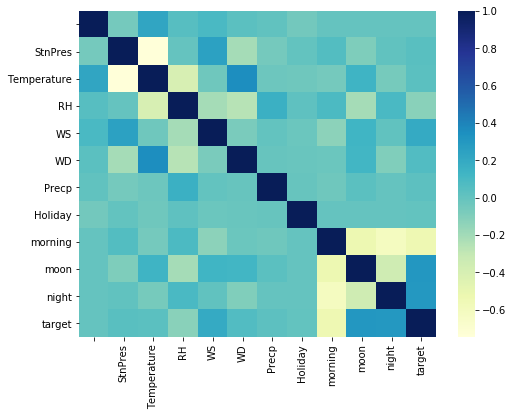

In [4]:
corr_pd = weather_dropna.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_pd, cmap='YlGnBu')

In [5]:
X=weather_dropna.iloc[:, 1:11].values
print(X)
# X=X.to_numpy()
y=weather_dropna.target.values
# y=y.to_numpy()

[[1.0148e+03 2.0100e+01 7.1000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0144e+03 1.9900e+01 7.3000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0134e+03 1.9400e+01 7.6000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0252e+03 1.6100e+01 8.7000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0252e+03 1.6000e+01 8.8000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0250e+03 1.6100e+01 8.9000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/notebook/machine learing/hands-on_part4/example/release/bin'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = DecisionTreeClassifier(max_depth=10)

model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))


# output tree structure
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("decsionTree2") 

number of correct sample: 3979
accuracy: 0.7530280090840272
con_matrix: [[2093  665]
 [ 640 1886]]


'decsionTree2.pdf'

In [7]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=100 ,random_state=1,max_depth=5)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
importances = model.feature_importances_ 


print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print("importance：",importances)

number of correct sample: 4070
accuracy: 0.7702498107494322
con_matrix: [[2012  699]
 [ 515 2058]]
importance： [0.02222427 0.0259772  0.01740347 0.05372863 0.0317181  0.00378398
 0.00197635 0.50883967 0.16134157 0.17300677]


In [8]:
from joblib import dump, load
dump(model, 'RandomForestClassifier.joblib')

['RandomForestClassifier.joblib']

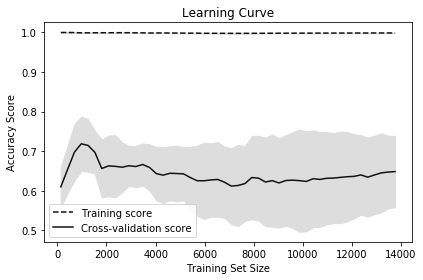

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# weather = pd.read_csv("C:/MRT/clusters_5/cleaned.csv")
# weather["target"]=weather['Get_In_Count']+weather['Way_Out_Count']
# weather_count=weather.drop(['Get_In_Count','Way_Out_Count','W_Station','Unnamed: 0','Date','Station'],axis=1)
# weather_dropna=weather_count.dropna()
# X=weather_dropna.iloc[:, 0:7].values
# # X=X.to_numpy()
# y=weather_dropna.target.values
# # y=y.to_numpy()

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation k=10
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores -1 表使用全部核心
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set 0.01-1 之間分50分
                                                        train_sizes=np.linspace(0.01, 1.0, 50))  

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [25]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1729)
print(X_train.shape, X_test.shape)
#模型引數設定
xlf = xgb.XGBRegressor(max_depth=10, 
learning_rate=0.1, 
n_estimators=200, 
silent=True, 
objective='reg:linear', 
nthread=-1, 
gamma=0,
min_child_weight=1, 
max_delta_step=0, 
subsample=0.85, 
colsample_bytree=0.7, 
colsample_bylevel=1, 
reg_alpha=0, 
reg_lambda=1, 
scale_pos_weight=1, 
seed=1440, 
missing=None)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=100)
# 計算 auc 分數、預測
preds = xlf.predict(X_test)


(15134, 10) (153, 10)
[11:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:0.48034
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.46974
[2]	validation_0-rmse:0.46415
[3]	validation_0-rmse:0.45428
[4]	validation_0-rmse:0.44794
[5]	validation_0-rmse:0.44383
[6]	validation_0-rmse:0.44127
[7]	validation_0-rmse:0.43902
[8]	validation_0-rmse:0.43591
[9]	validation_0-rmse:0.43256
[10]	validation_0-rmse:0.42939
[11]	validation_0-rm

In [9]:
random_model = load('RandomForestClassifier.joblib') 


In [10]:
test = pd.read_csv("C:/MRT/test/noTime_test.csv")
test.head()

,Unnamed: 0,,StnPres,Temperature,RH,WS,WD,Precp,Holiday,morning,moon,night,target
0,0,0,1020.3,15.3,97.0,2.0,77,0.5,1,1,0,0,0
1,1,1,1019.2,15.2,97.0,1.9,76,0.5,1,1,0,0,0
2,2,2,1019.8,15.2,97.0,2.4,73,0.5,1,1,0,0,0
3,3,3,1020.4,15.2,97.0,2.5,74,1.0,1,1,0,0,0
4,4,4,1021.3,15.3,97.0,2.1,70,0.0,1,1,0,0,0


In [11]:
test_count=test.drop(['Unnamed: 0'],axis=1)
test_dropna=test_count.dropna()

In [12]:
X=test_dropna.iloc[:, 1:11].values
print(X)
# X=X.to_numpy()
y=test_dropna.target.values
# y=y.to_numpy()

[[1.0203e+03 1.5300e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0192e+03 1.5200e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0198e+03 1.5200e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0263e+03 1.4200e+01 8.2000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0263e+03 1.4600e+01 8.1000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0259e+03 1.4600e+01 8.2000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = random_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# accuracy = random_model.score(X_test, y_test)
#print prediction result
print(y_pred)
#print accuracy 
print(accuracy)

[1 0 0 ... 1 1 0]
0.7694571615434925


Index(['StnPres', 'Temperature', 'RH', 'WS', 'WD', 'Precp', 'Holiday',
       'morning', 'moon', 'night', 'target'],
      dtype='object')
 1) morning                        0.508840
 2) night                          0.173007
 3) moon                           0.161342
 4) WS                             0.053729
 5) WD                             0.031718
 6) Temperature                    0.025977
 7) StnPres                        0.022224
 8) RH                             0.017403
 9) Precp                          0.003784
10) Holiday                        0.001976


IndexError: index 10 is out of bounds for axis 0 with size 10

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


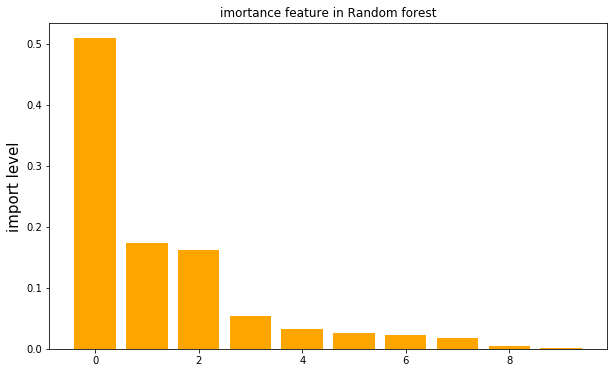

In [14]:
x_columns = weather_dropna.columns[1:]
feat_labels = weather_dropna.columns[1:]

print(feat_labels)
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))



plt.figure(figsize=(10,6))

plt.title("imortance feature in Random forest",fontsize = 12)
plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

for i in range(x_columns.shape[0]): 
    plt.bar(i,importances[indices[i]],color='orange',align='center')
plt.xticks(np.arange(x_columns.shape[0]),x_columns,rotation=90,fontsize=15) 
plt.show()


In [29]:
x_columns.shape[0]

11